In [1]:
import matrix_io as mio
import numpy as np

F = mio.read_matrix("side_c2v.ddm")
F.max(), F.min()

(2647.327385, -1244.205255)

<IPython.core.display.Javascript object>


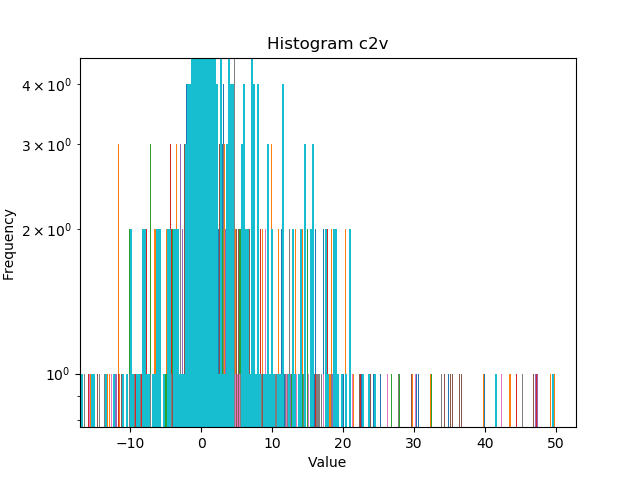

In [2]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import numpy as np

for c in range(10): 
    plt.hist(F[c,:], log=True, bins = 1000)
plt.title("Histogram c2v")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

<IPython.core.display.Javascript object>


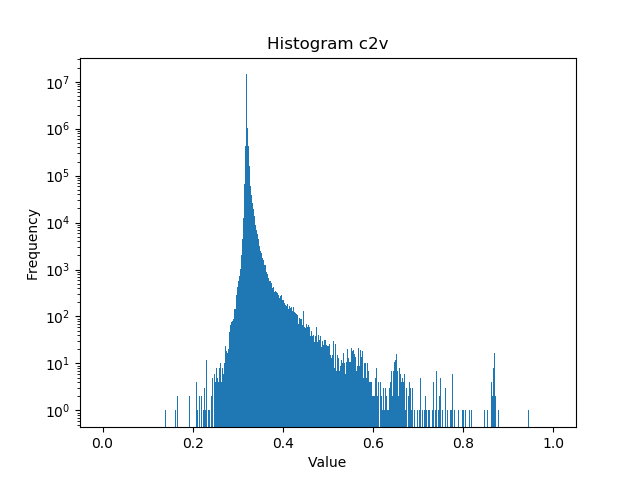

In [37]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import numpy as np

Fflat = (F.flatten() - F.min()) / (F.max() - F.min())
#plt.hist(Fflat, range =(-1000,2000), bins = 1000, log = True)
plt.hist(Fflat, bins=1000, log =True)

plt.title("Histogram c2v")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [24]:
F - F.min()

array([[1274.538235, 1260.752852, 1226.309232, ..., 1240.851103,
        1244.204803, 1244.205302],
       [1265.614361, 1274.062596, 1232.677254, ..., 1242.665492,
        1244.20515 , 1244.205267],
       [1269.559841, 1256.040119, 1225.980268, ..., 1241.034577,
        1244.204884, 1244.205247],
       ...,
       [1272.074422, 1263.937932, 1222.229486, ..., 1240.685071,
        1244.202666, 1244.205221],
       [1269.259959, 1262.45663 , 1227.64124 , ..., 1240.211919,
        1244.212274, 1244.205244],
       [1266.737214, 1258.394862, 1229.428043, ..., 1244.223826,
        1244.204927, 1244.205252]])

In [22]:
# convert to fixed point

bits = 8

# convert to 0-1 range
Fpos = F - F.min()
Fnorm = Fpos / Fpos.max()

# convert to 0..2^bits
F_8bit = np.around(Fnorm * (2**bits))

In [24]:
mio.write_matrix("side_c2v_8bit.ddm", F_8bit)

In [26]:
Fpos.min(), Fpos.max(), Fnorm.min(), Fnorm.max(), F_8bit.min(), F_8bit.max()

(0.0, 3891.5326400000004, 0.0, 1.0, 0.0, 256.0)

In [25]:
(2**bits)

256